# test Sequential

In [1]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
from loss import *
from activation import *


In [2]:
input_size = 2
hidden_size =16
output_size = 1
# Définir les données d'entraînement
X, Y = gen_arti(data_type=1)
Y = np.where(Y == -1, 0, Y)

In [3]:
linear1 = Linear(input_size, hidden_size)

tanh = TanH()
linear2 = Linear(hidden_size, output_size)
sigmoid = Sigmoid()
mse_loss = MSELoss()
ce_loss = CrossEntropyLoss()
loss_list = []

In [4]:
seq = Sequential([linear1, tanh, linear2, sigmoid])

In [6]:
# Boucle d'entraînement
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    yhat = seq.forward(X)

    # Calculer la perte
    loss = mse_loss.forward(Y, yhat)
    if epoch % 10 == 0:
        print("Epoch %d: Loss = %f" % (epoch, loss.mean()))
    loss_list.append(loss.mean())

    # Backward pass
    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)
    delta = mse_loss.backward(Y, yhat)
    delta = seq.backward(X, delta, gradient_step = 0.01)
print(np.where(np.round(yhat,0) ==Y,1 ,0).mean())

Epoch 0: Loss = 0.415815
Epoch 10: Loss = 0.406685
Epoch 20: Loss = 0.397542
Epoch 30: Loss = 0.388499
Epoch 40: Loss = 0.379670
Epoch 50: Loss = 0.371160
Epoch 60: Loss = 0.363053
Epoch 70: Loss = 0.355413
Epoch 80: Loss = 0.348279
Epoch 90: Loss = 0.341668
Epoch 100: Loss = 0.335577
Epoch 110: Loss = 0.329990
Epoch 120: Loss = 0.324881
Epoch 130: Loss = 0.320216
Epoch 140: Loss = 0.315962
Epoch 150: Loss = 0.312081
Epoch 160: Loss = 0.308539
Epoch 170: Loss = 0.305304
Epoch 180: Loss = 0.302343
Epoch 190: Loss = 0.299631
Epoch 200: Loss = 0.297141
Epoch 210: Loss = 0.294851
Epoch 220: Loss = 0.292740
Epoch 230: Loss = 0.290792
Epoch 240: Loss = 0.288990
Epoch 250: Loss = 0.287320
Epoch 260: Loss = 0.285770
Epoch 270: Loss = 0.284328
Epoch 280: Loss = 0.282985
Epoch 290: Loss = 0.281732
Epoch 300: Loss = 0.280561
Epoch 310: Loss = 0.279465
Epoch 320: Loss = 0.278439
Epoch 330: Loss = 0.277475
Epoch 340: Loss = 0.276571
Epoch 350: Loss = 0.275720
Epoch 360: Loss = 0.274918
Epoch 370: L

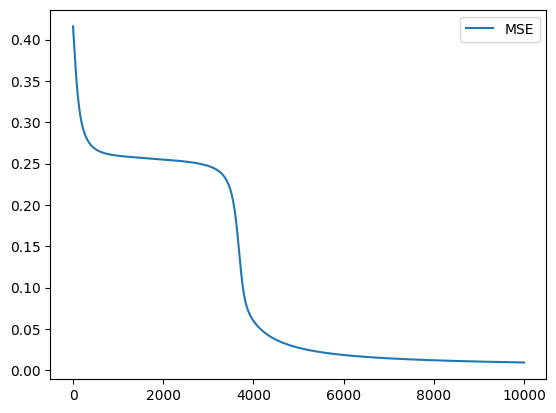

In [7]:
plt.plot(loss_list, label="MSE")
plt.legend()

plt.show()

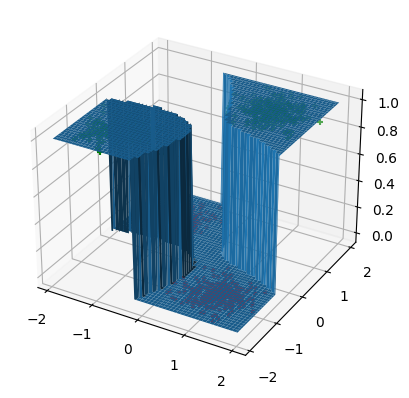

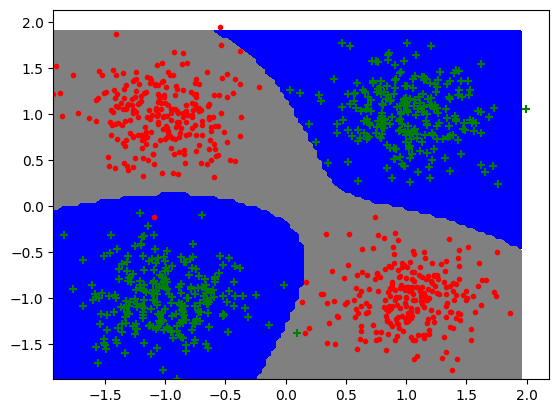

In [8]:
# Afficher les résultats
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plot_frontiere_3d(
    ax,
    X,
    lambda x: np.round(seq.forward(x), 0),
    step=100,
)

plot_data_3d(ax, X, Y)

plt.show()

plot_frontiere(
    X,
    lambda x: np.round(seq.forward(x), 0),
    step=100,
)

plot_data(X, Y)
plt.show()